In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import parallel_coordinates
'''
Pandas for handling the dataset
Matplotlib and Seaborn for Visualisations and Plotting

'''

In [3]:
df=pd.read_csv("final_merged.csv")
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Whole Year,Winter,Summer,Kharif,Rabi,Rainfall,so2,no2,rspm,spm,pm2_5
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0,2763.2,227.2,812.2,1244.2,479.5,1244.2,0.0,0.0,0.0,0.0,0.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0,2763.2,227.2,812.2,1244.2,479.5,1244.2,0.0,0.0,0.0,0.0,0.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0,2763.2,227.2,812.2,1244.2,479.5,1244.2,0.0,0.0,0.0,0.0,0.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0,2763.2,227.2,812.2,1244.2,479.5,2763.2,0.0,0.0,0.0,0.0,0.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0,2763.2,227.2,812.2,1244.2,479.5,2763.2,0.0,0.0,0.0,0.0,0.0


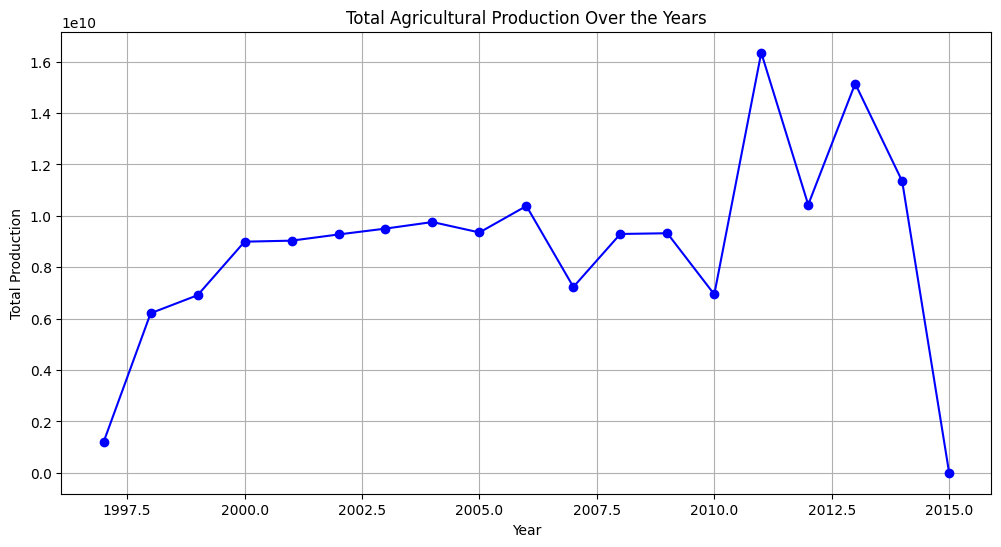

In [ ]:
'''Production By Year'''
df_total_production = df.groupby("Crop_Year")["Production"].sum()

plt.figure(figsize=(12, 6))
plt.plot(df_total_production.index, df_total_production.values, marker="o", linestyle="-", color="b")
plt.xlabel("Year")
plt.ylabel("Total Production")
plt.title("Total Agricultural Production Over the Years")
plt.grid(True)
plt.show()

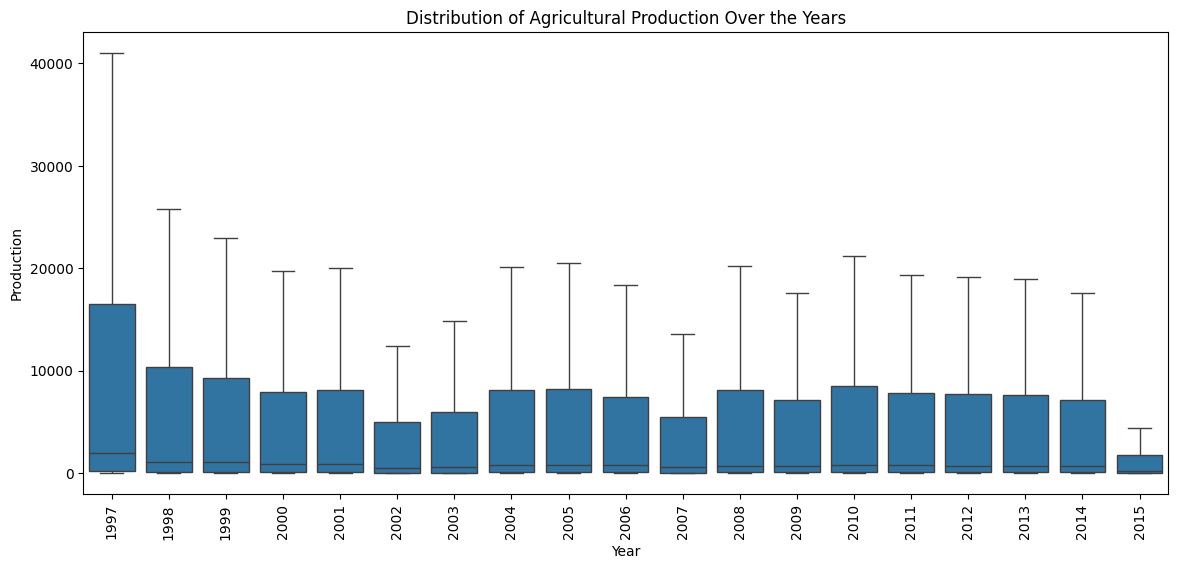

In [ ]:
'''Box Plot of Production distribution by year'''
plt.figure(figsize=(14, 6))
sns.boxplot(x=df["Crop_Year"], y=df["Production"], showfliers=False)
plt.xticks(rotation=90)
plt.xlabel("Year")
plt.ylabel("Production")
plt.title("Distribution of Agricultural Production Over the Years")
plt.show()

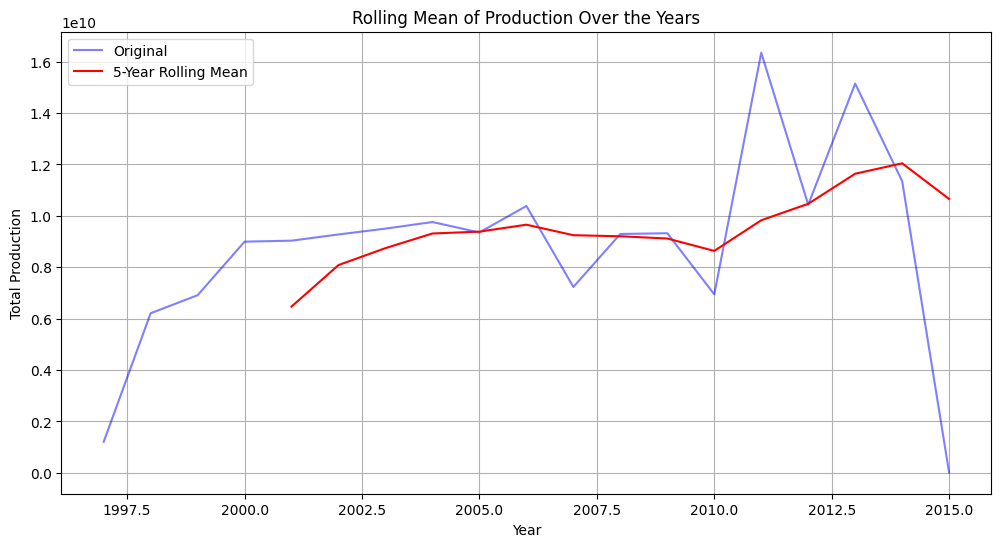

In [ ]:

'''Rolling Mean that shows the moving average of the data(usually used in Finance)'''
rolling_window = 5
df_total_production_roll = df_total_production.rolling(window=rolling_window).mean()

plt.figure(figsize=(12, 6))
plt.plot(df_total_production.index, df_total_production.values, label="Original", color="blue", alpha=0.5)
plt.plot(df_total_production.index, df_total_production_roll, label=f"{rolling_window}-Year Rolling Mean", color="red")
plt.xlabel("Year")
plt.ylabel("Total Production")
plt.title("Rolling Mean of Production Over the Years")
plt.legend()
plt.grid(True)
plt.show()

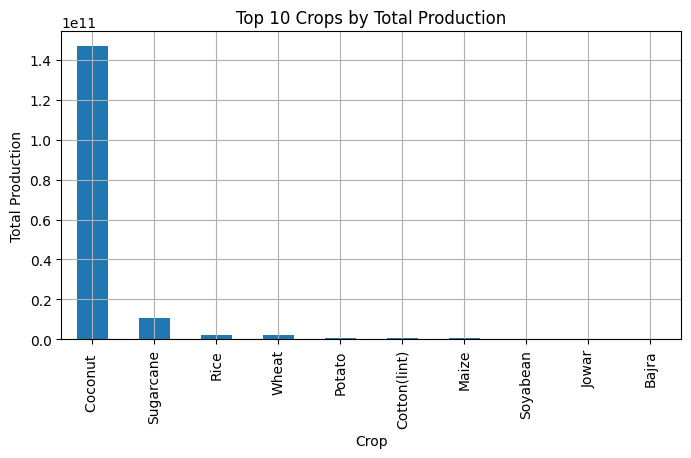

In [ ]:
'''Top Crops, will help in planning and alotting areas to plantations'''
top_crops = df.groupby('Crop')['Production'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(8,4))
top_crops.plot(kind='bar')
plt.title('Top 10 Crops by Total Production')
plt.ylabel('Total Production')
plt.grid()
plt.show()

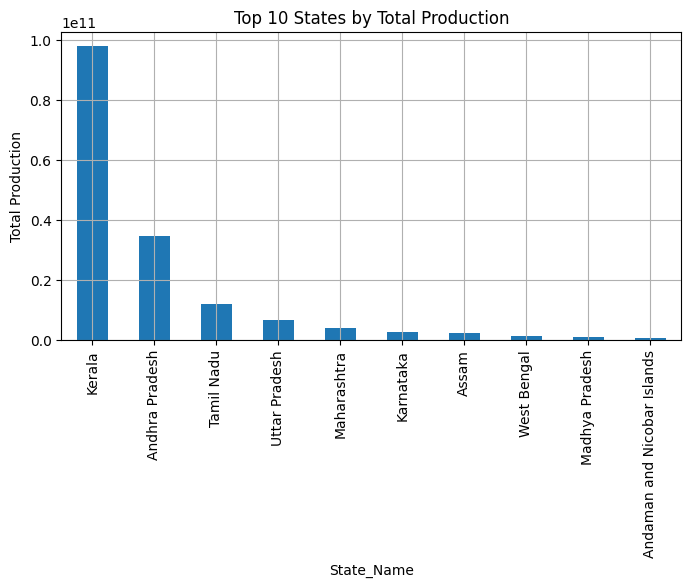

In [ ]:
'''Production based top States, will help government in helping the Poor production states as well as high performing states'''
top_crops = df.groupby('State_Name')['Production'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(8,4))
top_crops.plot(kind='bar')
plt.title('Top 10 States by Total Production')
plt.ylabel('Total Production')
plt.grid()
plt.show()

C:\Users\anura\AppData\Local\Temp\ipykernel_16052\4170057189.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Season', y='Production', data=df, estimator=sum, ci=None)


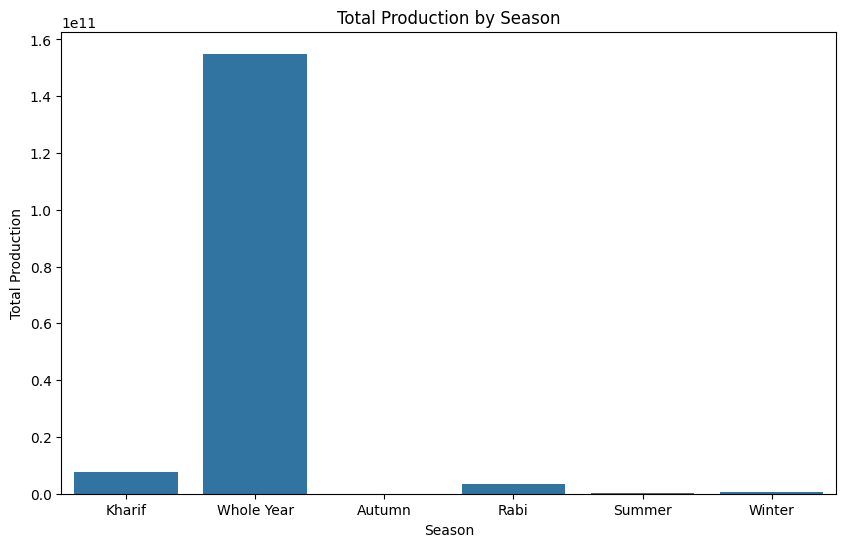

In [ ]:
'''Production by season, Whole Year can be ignored'''
plt.figure(figsize=(10, 6))
sns.barplot(x='Season', y='Production', data=df, estimator=sum, ci=None)
plt.title('Total Production by Season')
plt.ylabel('Total Production')
plt.show()

C:\Users\anura\AppData\Local\Temp\ipykernel_16052\3127245715.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Crop', y='Yield', data=top_10_df, estimator=sum, ci=None, palette='viridis')
C:\Users\anura\AppData\Local\Temp\ipykernel_16052\3127245715.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Crop', y='Yield', data=top_10_df, estimator=sum, ci=None, palette='viridis')


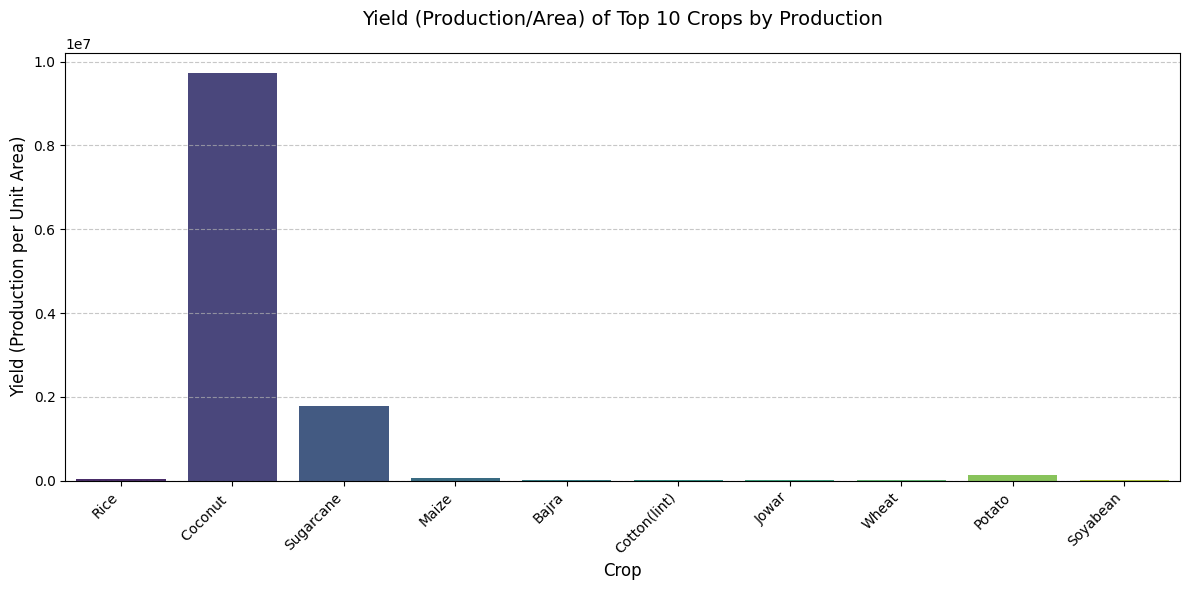

In [ ]:
'''Yield PLOT,(Production / Area), helps understand the crop dynamics better'''

df['Yield'] = df['Production'] / df['Area']

top_10_crops = df.groupby('Crop')['Production'].sum().nlargest(10).index.tolist()
top_10_df = df[df['Crop'].isin(top_10_crops)]


plt.figure(figsize=(12, 6))
sns.barplot(x='Crop', y='Yield', data=top_10_df, estimator=sum, ci=None, palette='viridis')


plt.title('Yield (Production/Area) of Top 10 Crops by Production', fontsize=14, pad=20)
plt.xlabel('Crop', fontsize=12)
plt.ylabel('Yield (Production per Unit Area)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.tight_layout()
plt.show()

C:\Users\anura\AppData\Local\Temp\ipykernel_16052\338236932.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected["Season"] = df_selected["Season"].astype(str)


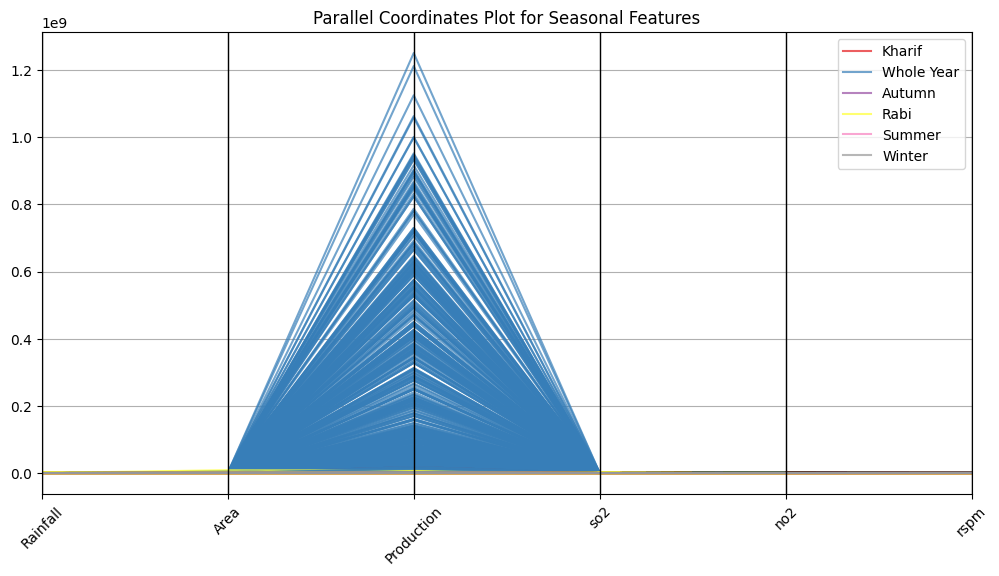

In [ ]:
'''To find relevant relationship between features'''

features = ["Rainfall", "Area", "Production", "so2", "no2", "rspm", "Season"]
df_selected = df[features]

df_selected["Season"] = df_selected["Season"].astype(str)

# Plot parallel coordinates
plt.figure(figsize=(12, 6))
parallel_coordinates(df_selected, "Season", colormap=plt.get_cmap("Set1"), alpha=0.7)
plt.xticks(rotation=45)
plt.title("Parallel Coordinates Plot for Seasonal Features")
plt.show()
